In [1]:
print("Author: Vladimir Eremin\nDescription: Kaggle playground competition")

Author: Vladimir Eremin
Description: Kaggle playground competition


In [14]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
#from scipy.sparse import vstack, csr_matrix, save_npz, load_npz
import warnings
import xgboost as xgb
from collections import defaultdict
import time
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from XGBoost.XGBoostOptimizer import XGBoostOptimizer
from DataProcessing import DataStats


dtypes = {'datetime': 'O',
             'season': 'category',
             'holiday': 'category',
             'workingday': 'category',
             'weather': 'category',
             'temp': 'float64',
             'atemp': 'float64',
             'humidity': 'int64',
             'windspeed': 'float64',
             'casual': 'int64',
             'registered': 'int64',
             'count': 'int64'}

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [17]:
traindf = pd.read_csv('/home/vlad/csv/Social/Bike-sharing-demand/train.csv'
                      ,dtype=dtypes,parse_dates=['datetime'])
print('Df size: ',traindf.shape,'\nMem used: ',round(sum(traindf.memory_usage()/1024/1024),2),'Mb')

Df size:  (10886, 12) 
Mem used:  0.71 Mb


In [36]:
traindf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
DataStats.get_df_stats(traindf)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,dtype
0,datetime,10886,0.0,0.009186,datetime64[ns]
1,season,4,0.0,25.114826,category
2,holiday,2,0.0,97.143120,category
3,workingday,2,0.0,68.087452,category
4,weather,4,0.0,66.066507,category
5,temp,49,0.0,4.289914,float64
6,atemp,60,0.0,6.163880,float64
7,humidity,89,0.0,3.380489,int64
8,windspeed,28,0.0,12.061363,float64
9,casual,309,0.0,9.057505,int64


In [19]:
traindf.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [31]:
#Define a null model - mean count value
null_pred = traindf.describe().loc['mean','count']
print('MAE for Null model: ',round(np.mean(np.abs(traindf['count'] - null_pred)),2))


#traindf['season',	'holiday',	'workingday'	'weather'	'temp'	'atemp'	'humidity'	'windspeed']

MAE for Null model:  142.71


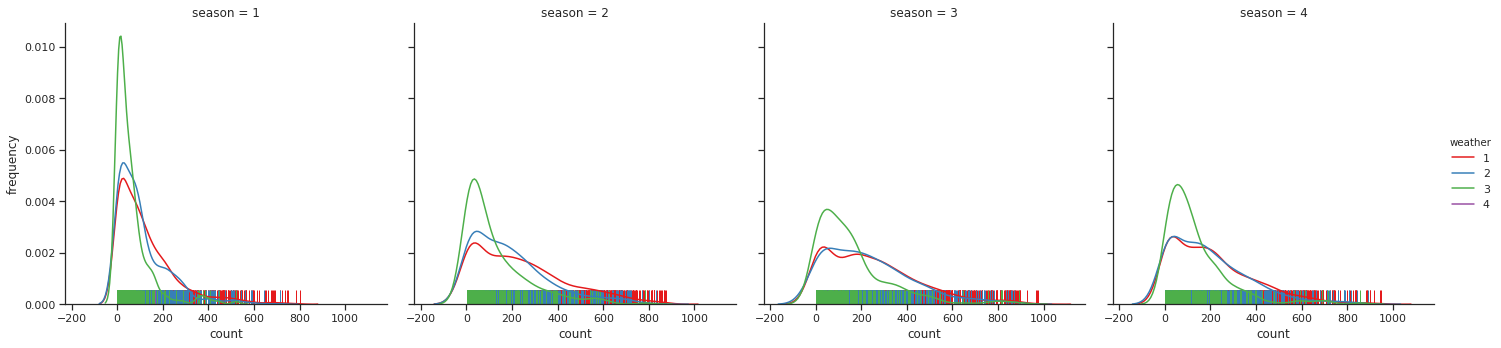

In [65]:
g = sns.FacetGrid(traindf, col='season', hue="weather", palette="Set1",size=5)
g = (g.map(sns.distplot, "count", hist=False, rug=True)
    .add_legend()
    .set_ylabels('density'))